In [4]:
from utils import load_ticker, split_data, min_max_scale, exp_mov_avg_smooth
import matplotlib.pyplot as plt
import numpy as np

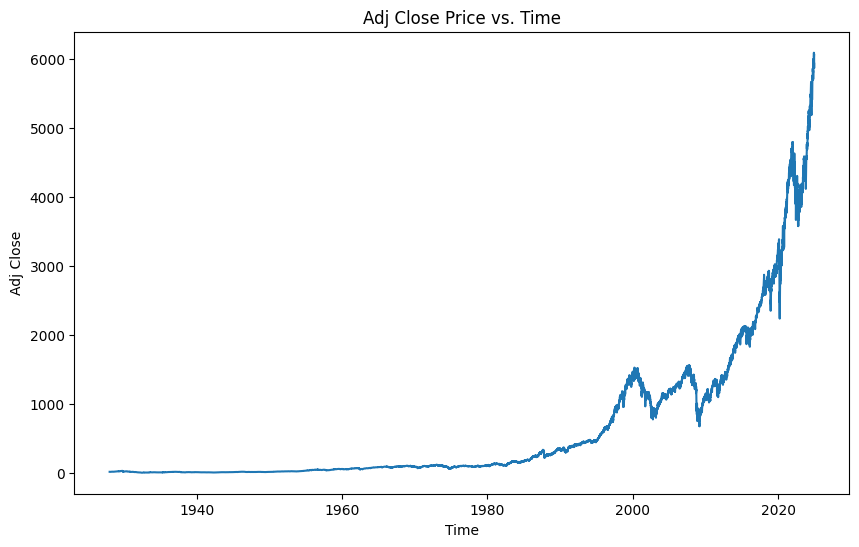

In [2]:
date, adj_close, data_df = load_ticker()
plt.figure(figsize=(10, 6))
plt.plot(date, adj_close)
plt.title('Adj Close Price vs. Time')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.show()

In [3]:
x_train, y_train, x_test, y_test = split_data(date, adj_close)

y_train, scaler = min_max_scale(y_train)
y_test = scaler.transform(y_test.reshape(-1, 1)).reshape(-1)

y_train = exp_mov_avg_smooth(y_train)


In [5]:
pred_window_size = 100
n = y_train.size
pred_y, pred_x, mse_error = [], [], []

for i in range(pred_window_size, n):
    pred_x.append(x_train[i])
    pred_y.append(np.mean(y_train[i - pred_window_size:i]))
    mse_error.append((pred_y[-1] - y_train[i]) ** 2)

print('MSE error for standard averaging: %.5f' % (0.5 * np.mean(mse_error)))

MSE error for standard averaging: 0.00010


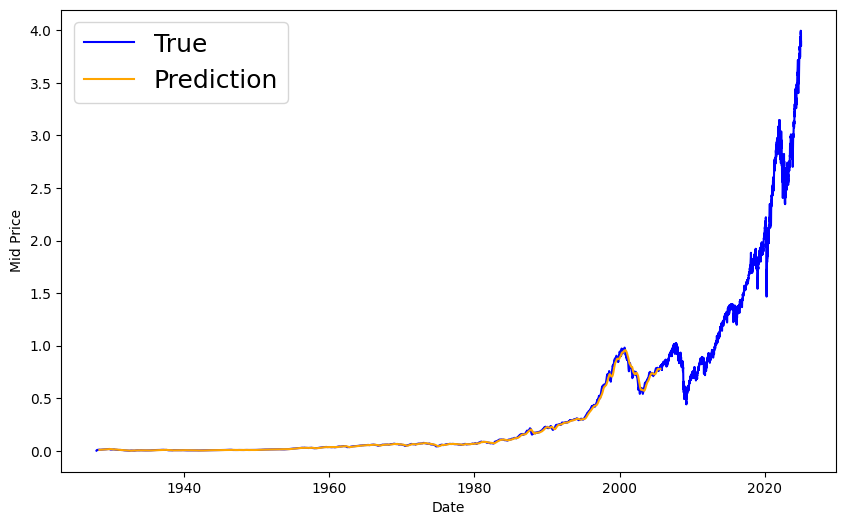

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(date, [*y_train, *y_test], color='blue',label='True')
plt.plot(pred_x, pred_y, color='orange', label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(fontsize=18)
plt.show()

In [12]:
pred_window_size = 100
n = y_test.size
pred_y, pred_x, mse_error = [], [], []

for i in range(pred_window_size, n):
    pred_x.append(x_test[i])
    pred_y.append(np.mean(y_test[i - pred_window_size:i]))
    mse_error.append((pred_y[-1] - y_test[i]) ** 2)

print('MSE error for standard averaging: %.5f' % (0.5 * np.mean(mse_error)))

MSE error for standard averaging: 0.00472


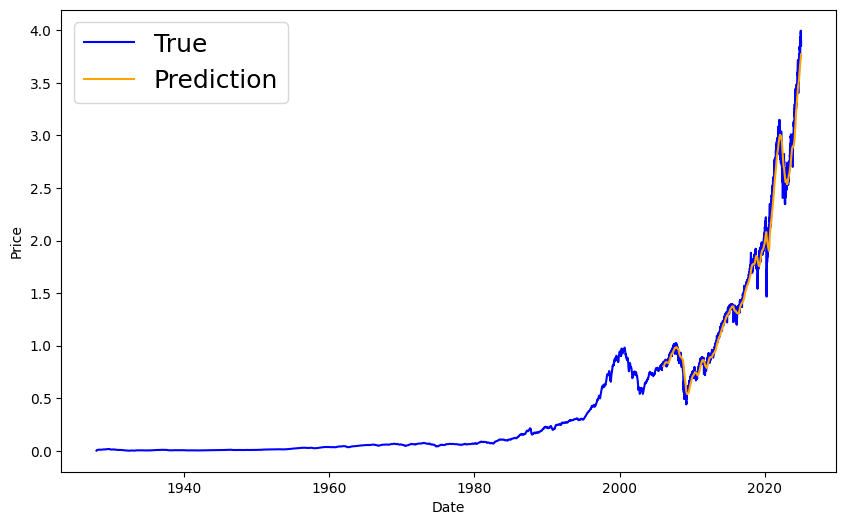

In [13]:
plt.figure(figsize = (10, 6))
plt.plot(date, [*y_train, *y_test], color='blue',label='True')
plt.plot(pred_x, pred_y, color='orange', label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(fontsize=18)
plt.show()